<a href="https://colab.research.google.com/github/yeonghun00/market-risk/blob/main/Volatility%20Modeling%20and%20Forecasting%20%3A%20(GARCH%2C%20EWMA%2C%20ARCH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy matplotlib
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.4 MB/s eta 0:00:00


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Fetching Data**

In [12]:
def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()  # Calculate daily returns
    return stock_data

# Example: Apple stock
ticker = "AAPL"
start_date = "2021-09-15"
end_date = "2024-09-15"

# Fetch data
stock_data = fetch_data(ticker, start_date, end_date)
stock_data = stock_data.dropna()  # Drop rows with NaN values
returns = stock_data['Returns']

[*********************100%***********************]  1 of 1 completed


### **1. GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**

**Explanation:**

The **GARCH(1,1)** model is a time-series model used to predict time-varying volatility in financial markets. It extends the **ARCH** model by including lagged conditional variances. GARCH captures **volatility clustering**, where periods of high volatility tend to be followed by other periods of high volatility.

#### **GARCH(1,1) Model Formula:**

$$
\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2
$$

Where:
- $\sigma_t^2$ is the conditional variance (volatility) at time $t$,
- $\omega$ is a constant term,
- $\alpha$ is the weight given to the previous squared error term $\epsilon_{t-1}^2$ (ARCH effect),
- $\beta$ is the weight given to the previous period’s volatility $\sigma_{t-1}^2$ (GARCH effect),
- $\epsilon_{t-1}$ is the error term (return shock) at time $t-1$.

The model assumes that today's volatility depends on both the past volatility and past errors. In practice, the **GARCH(1,1)** model is commonly used because it fits well with financial data.


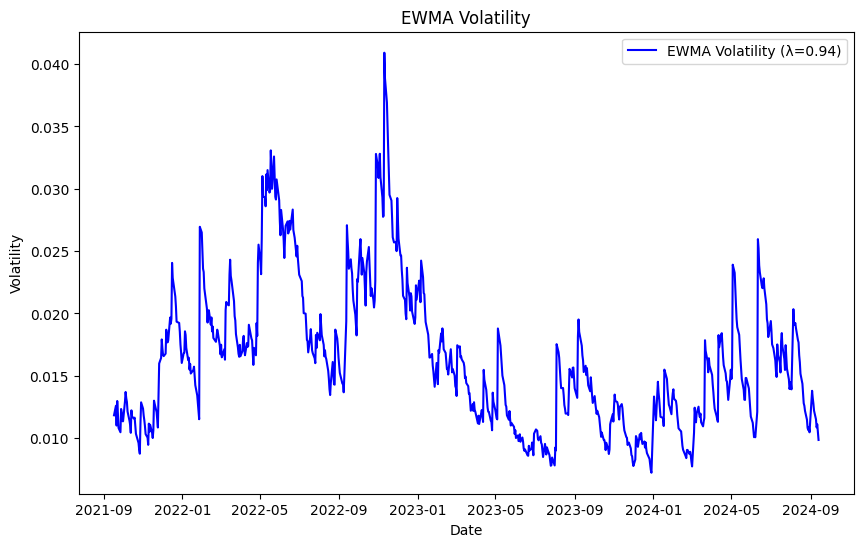

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate EWMA volatility
def calculate_ewma(returns, lambda_=0.94):
    ewma_volatility = returns.ewm(span=(1/(1 - lambda_)), adjust=False).std()
    return ewma_volatility

# Calculate EWMA volatility
ewma_volatility = calculate_ewma(returns)

# Plot EWMA volatility
plt.figure(figsize=(10, 6))
plt.plot(ewma_volatility, label='EWMA Volatility (λ=0.94)', color='blue')
plt.title('EWMA Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### **2. EWMA (Exponentially Weighted Moving Average)**

**Explanation:**

The **EWMA** model is a simple yet powerful technique to estimate volatility. It gives **more weight to recent returns**, making it responsive to sudden changes in the market, while still accounting for past observations. This model is widely used in risk management, particularly in the calculation of **Value at Risk (VaR)**.

#### **EWMA Model Formula:**

$
\sigma_t^2 = (1 - \lambda) \cdot \epsilon_t^2 + \lambda \cdot \sigma_{t-1}^2
$

Where:
- $\sigma_t^2$ is the variance at time $t$,
- $\lambda$ is the **decay factor** (usually set around 0.94 in practice),
- $\epsilon_t^2$ is the squared return (or error) at time $t$,
- $\sigma_{t-1}^2$ is the variance from the previous time step.

The value of $\lambda$ controls the rate of decay of past volatility. A higher $\lambda$ (e.g., 0.94) means more weight is given to past volatilities, while a lower $\lambda$ means recent volatilities dominate.

**Common Practice:**
- $\lambda = 0.94$ is used in financial applications (like RiskMetrics), as it strikes a balance between responsiveness and smoothing of the volatility.


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002991. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


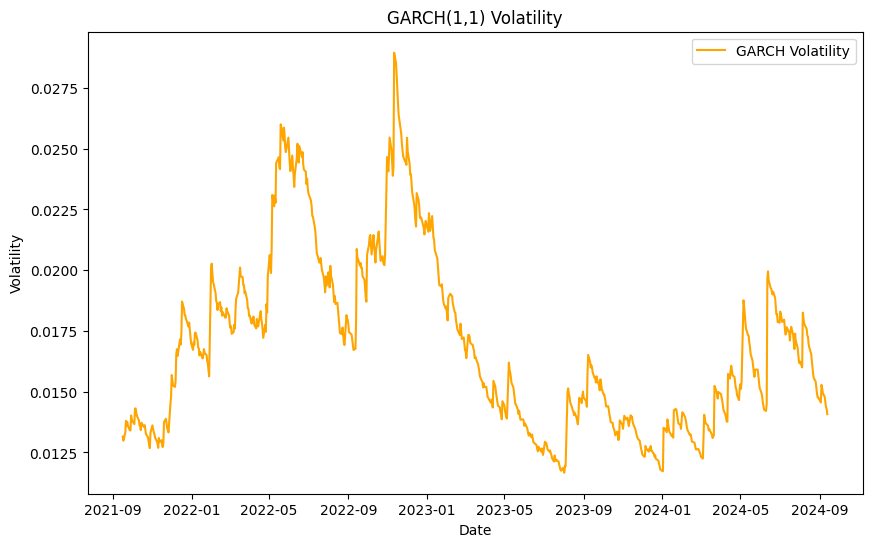

In [14]:
from arch import arch_model

# Fit a GARCH(1,1) model to the returns
def fit_garch(returns):
    model = arch_model(returns, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp="off")
    return garch_fit

# Fit the GARCH model and get conditional volatility
garch_fit = fit_garch(returns)
garch_volatility = garch_fit.conditional_volatility

# Plot GARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_volatility, label='GARCH Volatility', color='orange')
plt.title('GARCH(1,1) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


### **3. ARCH (Autoregressive Conditional Heteroskedasticity)**

**Explanation:**

The **ARCH** model, developed by Robert Engle, assumes that volatility at any point in time is dependent on the **squared returns** of previous periods. It is useful for modeling **heteroskedasticity**, where variance changes over time, a common phenomenon in financial time series.

#### **ARCH(1) Model Formula:**

$\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2$

Where:
- $\sigma_t^2$ is the conditional variance at time $t$,
- $\omega$ is a constant term,
- $\alpha$ is the weight given to the previous squared error $\epsilon_{t-1}^2$,
- $\epsilon_{t-1}$ is the error term (return shock) at time $t-1$.

The **ARCH(1)** model focuses on periods of high and low volatility, assuming that volatility today depends on the magnitude of the previous period's return shock.

The **ARCH** model is simpler than GARCH but still effectively captures periods of volatility clustering, making it suitable for detecting sudden bursts of volatility in financial markets.


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002991. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


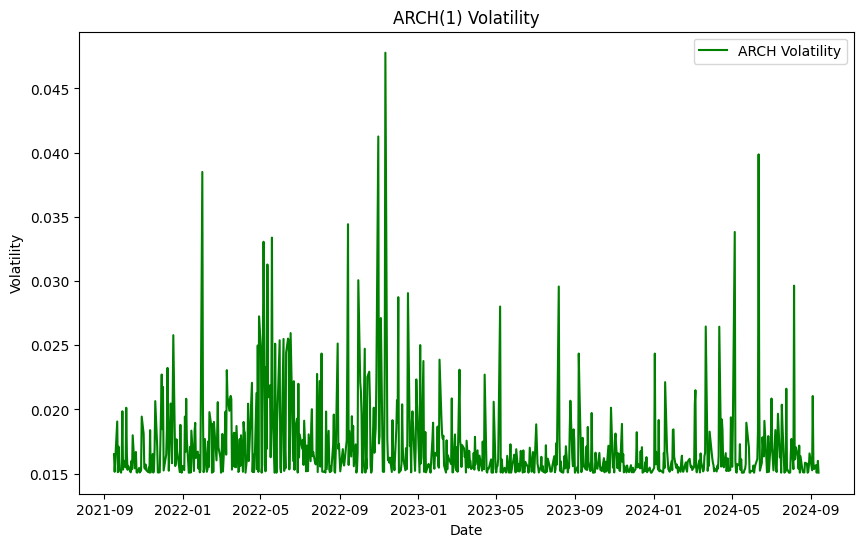

In [15]:
# Fit an ARCH(1) model to the returns
def fit_arch(returns):
    model = arch_model(returns, vol='ARCH', p=1)
    arch_fit = model.fit(disp="off")
    return arch_fit

# Fit the ARCH model and get conditional volatility
arch_fit = fit_arch(returns)
arch_volatility = arch_fit.conditional_volatility

# Plot ARCH volatility
plt.figure(figsize=(10, 6))
plt.plot(arch_volatility, label='ARCH Volatility', color='green')
plt.title('ARCH(1) Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()
